/tmp/ipython-input-1788472180.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0446
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0016
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5501e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6282e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.8365e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.4870e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.3570e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1403e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.1178e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0168e-04
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6594e-04
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.6402e-04
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.8910e-04
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1332e-04
Epoch 15/20
30/30 ━━━━━━

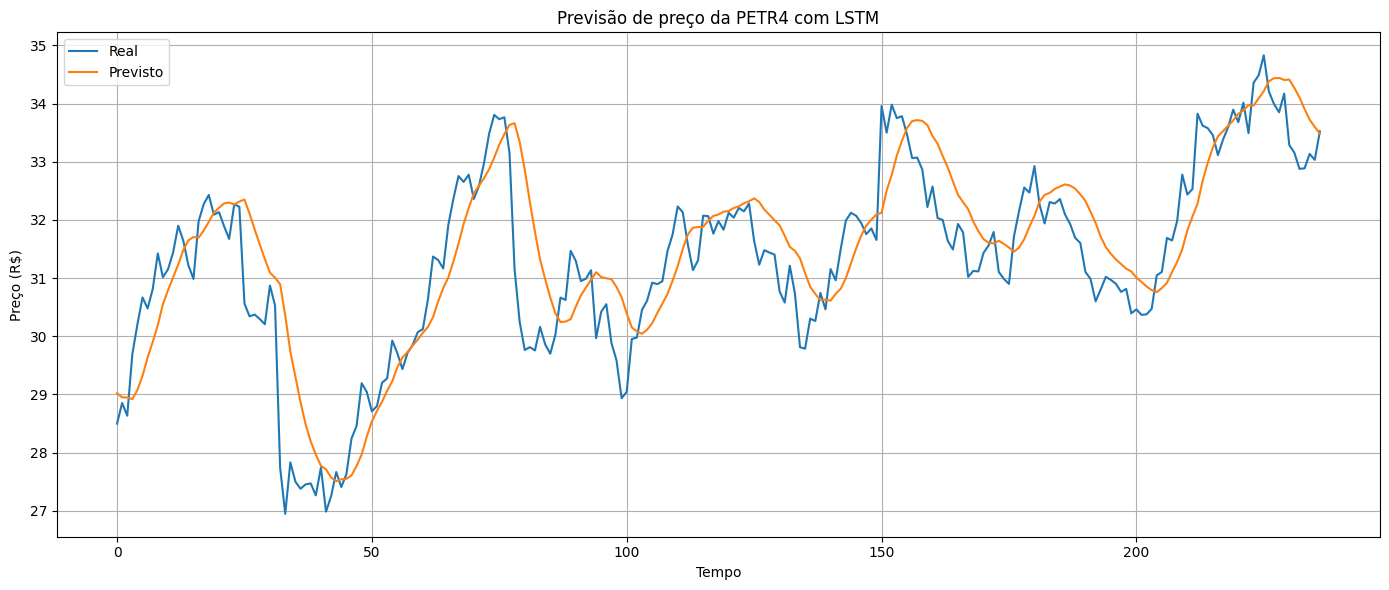

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Baixar dados históricos da PETR4
ticker = 'PETR4.SA'
df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
fechamento = df['Close'].values.reshape(-1, 1)

# Normalizar os dados (entre 0 e 1)
scaler = MinMaxScaler()
fechamento_normalizado = scaler.fit_transform(fechamento)

# Criar sequências para treino (usando 60 dias para prever o próximo)
X = []
y = []
for i in range(60, len(fechamento_normalizado)):
    X.append(fechamento_normalizado[i-60:i])
    y.append(fechamento_normalizado[i])

X = np.array(X)
y = np.array(y)

# Dividir em treino e teste
divisao = int(len(X) * 0.8)
X_train, X_test = X[:divisao], X[divisao:]
y_train, y_test = y[:divisao], y[divisao:]

# Criar modelo LSTM
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinar modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Fazer previsões
previsoes = model.predict(X_test)
previsoes_invertidas = scaler.inverse_transform(previsoes)
y_test_invertido = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotar resultados
plt.figure(figsize=(14,6))
plt.plot(y_test_invertido, label='Real')
plt.plot(previsoes_invertidas, label='Previsto')
plt.title('Previsão de preço da PETR4 com LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço (R$)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
